In [1]:
import os

os.getcwd()

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING'

In [2]:
os.chdir('C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri')

In [3]:
path=os.getcwd()

In [4]:
path

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri'

In [13]:
folders=os.listdir(path)

In [14]:
folders

['no', 'test_data', 'yes']

In [15]:
folders =[os.path.join(path,i) for i in folders if i=='no' or i=='yes']
folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes']

In [16]:
folders_labels =[i.split('\\')[-1] for i in folders]
folders_labels

['no', 'yes']

In [19]:
def image_aug(file,label):
    x=cv2.imread(file,cv2.IMREAD_COLOR)
    x=x.reshape((1,)+x.shape)
    datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.5, rotation_range=30,
                                   width_shift_range=0.3, height_shift_range=0.2, shear_range=0.5,
                                 brightness_range=[1.0,1.6],
                                   horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    i=0
    for batch in datagen.flow(x,batch_size=1,save_to_dir=os.path.join(path,label),save_prefix=label,save_format='jpeg'):
        i+=1
        if i>=40:
            break
    

In [24]:
data=[os.path.join(path,j,i) for j in folders_labels for i in os.listdir(j) ]

In [25]:
data_labels=[i.split('\\')[-2] for i in data]
len(data_labels)

243

In [28]:
for i,j in zip(data,data_labels):
    image_aug(i,j)

In [32]:
len(os.listdir(folders[1])+os.listdir(folders[0]))

7868

In [18]:
len(os.listdir(folders[0]))

93

In [14]:
def image_generation(folder,label):
    img_dir =os.listdir(folder)
    img=os.path.join(path,label,random.choice(img_dir))
    img=load_img(img)
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    
    
    datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

    i=0
    for batch in datagen.flow_from_directory(x,batch_size=1,save_to_dir=os.path.join(path,label),save_prefix=label,save_format='jpeg'):
        i+=1
        if i>=40:
            break

#### PACKAGES

In [12]:
x=img_to_array(load_img(os.path.join(path,folders_labels[0],random.choice(os.listdir(folders[0])))))

In [13]:
x.shape

(301, 275, 3)

In [15]:
for i,j in zip(folders,folders_labels):
    image_generation(i,j)

In [17]:
len(os.listdir(folders[1]))

195

In [27]:
from tqdm import tqdm

# for reading images
import cv2

# for array conversions
import numpy as np

#model selection
from sklearn.model_selection import train_test_split

#Filter warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# ENCODING CATEGORIES INTO NUMERICALS
from sklearn.preprocessing import LabelEncoder

# KERAS PACKAGES
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing.image import load_img,img_to_array,array_to_img



Using TensorFlow backend.


In [42]:
folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes']

In [148]:
random.seed(234567)

TEST_DATA=[os.path.join(path,j,i) for j in folders_labels for i in random.sample(set(os.listdir(j)),k=5) ]

In [67]:
data =list(set(data)-set(TEST_DATA))

In [68]:
len(data)

243

In [69]:
test_dir='test_data'


In [70]:
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None


In [71]:
import shutil

In [73]:
for fn in TEST_DATA:
    shutil.copy(fn, test_dir)

In [78]:
for file in TEST_DATA:
    if file in data:
        os.remove(file)

In [75]:
len(data)

243

In [79]:
TEST_DATA

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no\\12 no.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no\\29 no.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no\\41 no.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no\\44no.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\no\\46 no.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y182.JPG',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y4.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y111.JPG',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y162.jpg',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y181.jpg']

In [ ]:
def image_generation(file,label):
    img_dir =os.listdir(folder)
    img=os.path.join(path,label,random.choice(img_dir))
    img=load_img(img)
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    
    
    datagen = ImageDataGenerator(rescale=1./255, zoom_range=[0.3,0.8], rotation_range=50,
                                   width_shift_range=[-0.5,0.5], height_shift_range=0.5, shear_range=0.3,brightness_range=[0.4,1.0]
                                   horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

    i=0
    for batch in datagen.flow_from_directory(x,batch_size=1,save_to_dir=os.path.join(path,label),save_prefix=label,save_format='jpeg'):
        i+=1
        if i>=40:
            break

In [80]:
data[0]

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y148.JPG'

In [ ]:
for i in data:
    

In [81]:
path

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri'

In [83]:
folders_labels

['no', 'yes']

In [122]:
for i,j in zip(data,data_labels):
    image_aug(i,j)

243

In [84]:
data[0]

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y148.JPG'

In [94]:
img_to_array(load_img(data[0])).shape

(283, 231, 3)

In [99]:
def img_process(file):
    img=load_img(file)
    x=img_to_array(file)
    return x

In [100]:
data=[img_process(i) for i in data]

ValueError: could not convert string to float: 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\DEEP LEARNING\\brain-mri\\yes\\Y148.JPG'

In [109]:
data=[i.replace('\\','/') for i  in data]
data[0]

'C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri/yes/Y148.JPG'

In [115]:
img_process(data[1])

ValueError: could not convert string to float: 'C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri/yes/Y166.JPG'

In [120]:
x=cv2.imread(data[0],cv2.IMREAD_COLOR,)
x.shape

(283, 231, 3)

In [116]:
import cv2

In [ ]:
d

In [126]:
len(os.listdir(folders[1])+os.listdir(folders[0]))

7856

In [10]:
data=[]
labels=[]

In [11]:
def make_train_data(cat_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,cat_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        data.append((img))
        labels.append(str(label))
        

In [12]:
def assign_label(img,cat_type):
    return cat_type

In [13]:
IMG_SIZE =224

In [9]:
path =os.getcwd()
path=path.replace('\\','/')


In [10]:
folders_path=[path+'/'+i for i in os.listdir(os.getcwd()) if i.startswith('n') or i.startswith('y')]
folders_path

['C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri-images-for-brain-tumor-detection/no',
 'C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri-images-for-brain-tumor-detection/yes']

In [11]:
folders = [i.split('/')[-1] for i in folders_path]
folders

['no', 'yes']

In [18]:
for i in folders:
    for j in folders_labels:
        make_train_data(j,i)
        

100%|███████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 259.88it/s]


In [13]:
len(data)
len(labels)

506

TypeError: unhashable type: 'numpy.ndarray'

In [14]:
set(labels)

{'no', 'yes'}

In [58]:
data[0].shape

(180, 180, 3)

In [59]:
# recaling pixel values
data =np.array(data)
data=data/255
#data =np.expand_dims(data,axis=3)

In [43]:
len(data)

506

In [54]:
data[0].shape

(180, 180, 1, 3)

In [17]:
 #  LABEL ENCODING
le=LabelEncoder()
Y=le.fit_transform(labels)
Y=to_categorical(Y,2)
Y =np.array(Y)

In [18]:
len(Y)

506

In [28]:
x_train,x_test,y_train,y_test=train_test_split(data,Y,test_size=0.1,random_state=809)

In [29]:
len(x_train)

455

In [140]:
import numpy as np
from scipy.ndimage.interpolation import zoom
#import Image
zoom_factor = 0.05 # 5% of the original image  
img=Image.open(data[0])
image_array = misc.fromimage(img)
zoomed_img = clipped_zoom(image_array, zoom_factor)
misc.imsave('output.png', zoomed_img)

NameError: name 'clipped_zoom' is not defined

In [139]:
from PIL import Image
from scipy import misc

In [130]:
!pip install Image




  Running setup.py bdist_wheel for Image: started
  Running setup.py bdist_wheel for Image: finished with status 'done'
  Stored in directory: C:\Users\anish_yagt7hg\AppData\Local\pip\Cache\wheels\15\e7\2c\8806acfc81e754e18f3077a14b69c8200f82478489a985feda
Successfully built Image


In [143]:
from matplotlib import pyplot
from numpy import expand_dims

In [145]:
data[0]

array([[255., 255., 255.],
       [234., 234., 234.],
       [  2.,   2.,   2.],
       [  5.,   5.,   5.],
       [  2.,   2.,   2.],
       [  1.,   1.,   1.],
       [  2.,   2.,   2.],
       [  2.,   2.,   2.],
       [ 19.,  19.,  19.],
       [ 10.,  10.,  10.],
       [  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [ 20.,  20.,  20.],
       [  0.,   0.,   0.],
       [  3.,   3.,   3.],
       [  1.,   1.,   1.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  8.,   8.,   8.],
       [  0.,   0.,   0.],
       [  2.,   2.,   2.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  4.,   4.,   4.],
       [  2.,   2.,   2.],
       [  4.,   4.,   4.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  3.,   3.,   3.],
       [  0.,   0.,   0.],
       [  3.,   3.,   3.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  5.,   5.,   5.],
 

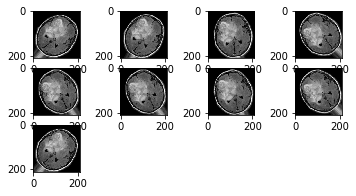

In [202]:
# load the image
img = load_img('C:/Users/anish_yagt7hg/Desktop/internship/DEEP LEARNING/brain-mri/yes/Y2.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
ImageDataGenerator(rescale=1./255, zoom_range=0.5, rotation_range=30,
                                   width_shift_range=0.3, height_shift_range=0.2, shear_range=0.5,
                                 brightness_range=[1.0,1.6],
                                   horizontal_flip=True,vertical_flip=True,fill_mode='nearest')# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(440 +1+ i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [38]:
zoom_range=0.5,width=0.3,height=0.2,brightness=[1,1.5],shear_range=0.5,

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 178, 178, 64)      640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 87, 87, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 43, 43, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 41, 41, 256)       295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 102400)            0         
__________

In [39]:
print(len(x_train),len(y_train))

455 455


Train on 455 samples, validate on 51 samples
Epoch 1/30
455/455 [==============================] - 86s 188ms/step - loss: 0.7148 - acc: 0.4978 - val_loss: 0.6916 - val_acc: 0.6078
Epoch 2/30
455/455 [==============================] - 101s 222ms/step - loss: 0.6936 - acc: 0.4879 - val_loss: 0.6930 - val_acc: 0.6078
Epoch 3/30
455/455 [==============================] - 104s 229ms/step - loss: 0.6932 - acc: 0.4813 - val_loss: 0.6935 - val_acc: 0.3922
Epoch 4/30
455/455 [==============================] - 122s 268ms/step - loss: 0.6932 - acc: 0.5121 - val_loss: 0.6936 - val_acc: 0.3922
Epoch 5/30
455/455 [==============================] - 91s 201ms/step - loss: 0.6931 - acc: 0.5121 - val_loss: 0.6936 - val_acc: 0.3922
Epoch 6/30
455/455 [==============================] - 98s 216ms/step - loss: 0.6931 - acc: 0.5121 - val_loss: 0.6936 - val_acc: 0.3922
Epoch 7/30
455/455 [==============================] - 92s 202ms/step - loss: 0.6941 - acc: 0.4945 - val_loss: 0.6956 - val_acc: 0.3922
Epoch 8

KeyboardInterrupt: 